In [1]:
import numpy as np
from prettytable import PrettyTable
from task1.poly_plot import plot_isd

In [2]:
x_i = np.array([4.2, 4.28, 4.36, 4.44, 4.52, 4.6, 4.68, 4.76, 4.84, 4.92, 5])
counts = np.array([2, 6, 10, 14, 16, 8, 6, 4, 2, 1])
n = np.sum(counts)
a = 0.01

h = x_i[1] - x_i[0]

In [3]:
print(f'n = {n}')

n = 114


In [4]:
print(f'h = {h: .3f}')

h =  12.000


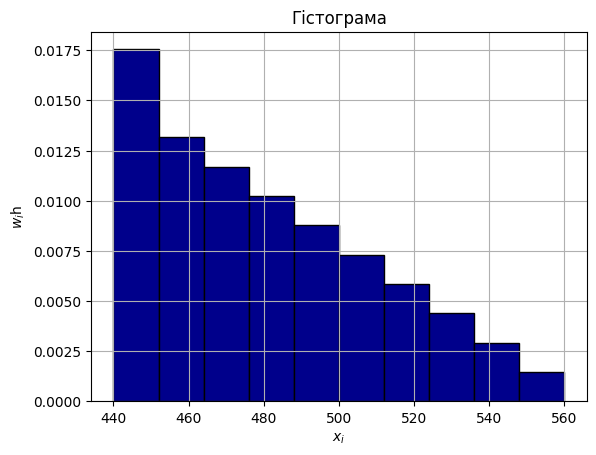

In [5]:
w_div_h = []
for i in counts:
    w_div_h.append(round(i/(n*h), 6))

plot_isd(x_i, w_div_h)

In [6]:
values = []
for i in range(np.size(x_i)-1):
    num = x_i[i]+x_i[i+1]
    num /= 2
    values.append(num)

In [7]:
table = PrettyTable()
table.field_names = ["i", "x_i", "n_i"]
for i in range(np.size(values)):
    table.add_row([i+1, values[i], counts[i]])
print(table)

+----+-------+-----+
| i  |  x_i  | n_i |
+----+-------+-----+
| 1  | 446.0 |  24 |
| 2  | 458.0 |  18 |
| 3  | 470.0 |  16 |
| 4  | 482.0 |  14 |
| 5  | 494.0 |  12 |
| 6  | 506.0 |  10 |
| 7  | 518.0 |  8  |
| 8  | 530.0 |  6  |
| 9  | 542.0 |  4  |
| 10 | 554.0 |  2  |
+----+-------+-----+


In [8]:
x_b = round(np.sum(values * counts) / n, 3)
print(f'x_b = {x_b}')

x_b = 480.737


In [9]:
d = round(np.sum(np.power(values, 2) * counts) / np.sum(counts) - np.power(x_b, 2), 3)
print(f"D_b = {d}")

D_b = 877.411


In [10]:
sigma = round(np.sqrt(d), 3)
print(f"sigma = {sigma}")

sigma = 29.621


In [11]:
def calc_z_i(x, x_b, sigma):
    return (x - x_b)/sigma

z = []
for i in range(len(x_i)):
    if i == 0:
        z.append(0)
    elif i == len(x_i)-1:
        z.append(0)
    else:
        num = calc_z_i(x_i[i], x_b, sigma)
        z.append(num)

In [12]:
from scipy.special import erf
Phi = lambda x: erf(x/2**0.5)/2

In [13]:
Phi_z = []
for i in range(len(z)):
    if i == 0:
        Phi_z.append(-0.5)
    elif i == len(z)-1:
        Phi_z.append(0.5)
    else:
        num = Phi(z[i])
        Phi_z.append(num)

In [14]:
P = []
for i in range(len(Phi_z)-1):
    P.append(Phi_z[i+1] - Phi_z[i])

In [15]:
table = PrettyTable()
table.field_names = ["i", "x_i", "x_i+1", "z_i", "z_i+1","Ф(z_i)", "Ф(z_i+1)", "P_i"]

for i in range(len(z)-1):
    
    table.add_row([i+1,
                   x_i[i],
                   x_i[i+1],
                   round(z[i], 4) if i != 0 else "-inf",
                   round(z[i+1], 4) if i+1 != len(z)-1 else "+inf",
                   round(Phi_z[i], 4),
                   round(Phi_z[i+1], 4),
                   round(P[i], 4),])

table.add_row(["-",
               "-",
               "-",
               "-",
               "-",
               "-",
               "Сума",
               round(np.sum(P), 4)
               ])
table

i,x_i,x_i+1,z_i,z_i+1,Ф(z_i),Ф(z_i+1),P_i
1,440,452,-inf,-0.9702,-0.5,-0.334,0.166
2,452,464,-0.9702,-0.565,-0.334,-0.214,0.12
3,464,476,-0.565,-0.1599,-0.214,-0.0635,0.1504
4,476,488,-0.1599,0.2452,-0.0635,0.0968,0.1604
5,488,500,0.2452,0.6503,0.0968,0.2423,0.1454
6,500,512,0.6503,1.0554,0.2423,0.3544,0.1121
7,512,524,1.0554,1.4606,0.3544,0.4279,0.0735
8,524,536,1.4606,1.8657,0.4279,0.469,0.041
9,536,548,1.8657,2.2708,0.469,0.4884,0.0195
10,548,560,2.2708,+inf,0.4884,0.5,0.0116


In [16]:
n1 = []
for i in P:
    n1.append(n*i)

sub_n = []
for i in range(len(counts)):
    sub_n.append(counts[i]-n1[i])

sub_n2 = []
for i in sub_n:
    sub_n2.append(np.pow(i, 2))

frac_sub_n2 = []
for i in range(len(sub_n2)):
    frac_sub_n2.append(sub_n2[i] / n1[i])

In [17]:
table = PrettyTable()
table.field_names = ["i", "n_i", "n'_i", "n_i-n'_i", "(n_i-n'_i)^2", "(n_i-n'_i)^2 / n'_i"]

for i in range(len(counts)):
    table.add_row([i+1,
                   counts[i],
                   round(n1[i], 4),
                   round(sub_n[i], 4),
                   round(sub_n2[i], 4),
                   round(frac_sub_n2[i], 4)])

table.add_row(["Сума",
               np.sum(counts),
               np.sum(n1),
               "-",
               "-",
               round(np.sum(frac_sub_n2), 4)
               ])
table

i,n_i,n'_i,n_i-n'_i,(n_i-n'_i)^2,(n_i-n'_i)^2 / n'_i
1,24,18.9222,5.0778,25.784,1.3626
2,18,13.6845,4.3155,18.6235,1.3609
3,16,17.1511,-1.1511,1.325,0.0773
4,14,18.2829,-4.2829,18.3433,1.0033
5,12,16.5765,-4.5765,20.944,1.2635
6,10,12.7829,-2.7829,7.7445,0.6058
7,8,8.384,-0.384,0.1475,0.0176
8,6,4.6769,1.3231,1.7506,0.3743
9,4,2.2189,1.7811,3.1724,1.4297
10,2,1.3201,0.6799,0.4622,0.3502


In [18]:
pearson_observed = np.sum(frac_sub_n2)
print(f"χ^2 спост = {pearson_observed:.4f}")

χ^2 спост = 7.8452


In [19]:
from scipy.stats import chi2

In [20]:
k = len(values) - 2 - 1
print(f'k = {k}')

k = 7


In [21]:
critical_value = chi2.ppf(1 - a, k)
print(f"Критичне значення χ^2 для α = {a} та k = {k}: {critical_value:.4f}")

Критичне значення χ^2 для α = 0.01 та k = 7: 18.4753


In [22]:
if pearson_observed < critical_value:
    print("Оскільки χ^2спост < χ^2кр, гіпотезу про розподіл ознаки генеральної сукупності не відхиляємо")
else:
    print("Оскільки χ^2спост > χ^2кр, гіпотезу про розподіл ознаки генеральної сукупності відхиляємо")

Оскільки χ^2спост < χ^2кр, гіпотезу про розподіл ознаки генеральної сукупності не відхиляємо
